Next we take a look at the PRESCRIPTIONS Table.

Let's import the libraries that we will need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
prescriptions_df = pd.read_csv('../Extracted CSVs/PRESCRIPTIONS.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
prescriptions_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [5]:
prescriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4156450 entries, 0 to 4156449
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ROW_ID             int64  
 1   SUBJECT_ID         int64  
 2   HADM_ID            int64  
 3   ICUSTAY_ID         float64
 4   STARTDATE          object 
 5   ENDDATE            object 
 6   DRUG_TYPE          object 
 7   DRUG               object 
 8   DRUG_NAME_POE      object 
 9   DRUG_NAME_GENERIC  object 
 10  FORMULARY_DRUG_CD  object 
 11  GSN                object 
 12  NDC                float64
 13  PROD_STRENGTH      object 
 14  DOSE_VAL_RX        object 
 15  DOSE_UNIT_RX       object 
 16  FORM_VAL_DISP      object 
 17  FORM_UNIT_DISP     object 
 18  ROUTE              object 
dtypes: float64(2), int64(3), object(14)
memory usage: 602.5+ MB


In [6]:
prescriptions_df['DRUG_NAME_GENERIC'].value_counts()

Furosemide                      123216
Potassium Chloride               86443
Sodium Chloride 0.9%  Flush      83395
Metoprolol                       73787
Insulin - Sliding Scale          68441
                                 ...  
*NF* Cromolyn Sodium 4% Opth         1
Ampyra                               1
Alfuzosin                            1
Phenyleprhine Ophth Soln 10%         1
Tarceva(erlotinib)                   1
Name: DRUG_NAME_GENERIC, Length: 2863, dtype: int64

These are the generic names of the drugs that were prescribed.

<AxesSubplot:>

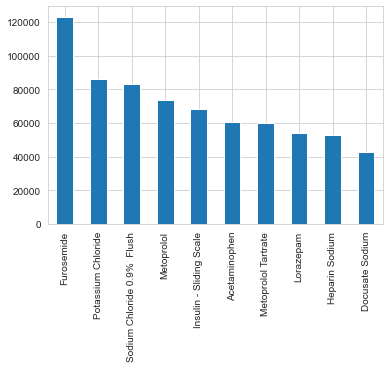

In [7]:
prescriptions_df['DRUG_NAME_GENERIC'].value_counts().head(10).plot(kind='bar')

Let's take a look at the types of the drugs that were prescribed.

In [8]:
prescriptions_df['DRUG_TYPE'].value_counts()

MAIN        3216882
BASE         925089
ADDITIVE      14479
Name: DRUG_TYPE, dtype: int64

([<matplotlib.patches.Wedge at 0x226b75c8670>,
 [Text(-0.83408408145553, 0.7171497368489268, 'MAIN'),
  Text(0.8261859493180422, -0.7262346570836767, 'BASE'),
  Text(1.0999341283091801, -0.012037997371844317, 'ADDITIVE')])

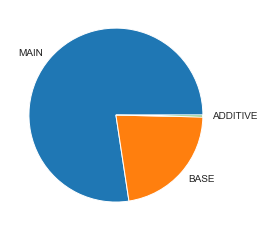

In [9]:
plt.pie(prescriptions_df['DRUG_TYPE'].value_counts(), labels='MAIN BASE ADDITIVE'.split())

<AxesSubplot:>

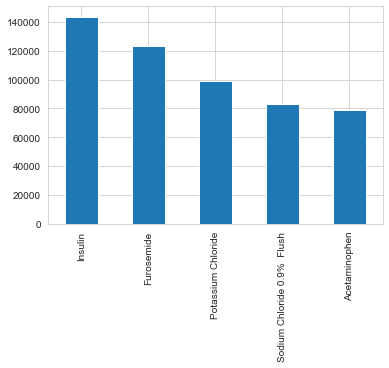

In [10]:
prescriptions_df['DRUG_NAME_POE'].value_counts().head().plot(kind='bar')

The above chart tells us the name of the drug on the Provider Order Entry interface.

And lastly, we take a look at the PROCEDURES_ICD table. This table has data regarding the procedures relating to a hospital admission coded using the ICD9 system, while the PROCEDURES_MV table has data about the procedure start and stop times recorded for MetaVision patients.

In [12]:
procedures_ICD_df = pd.read_csv('../Extracted CSVs/PROCEDURES_ICD.csv')
procedures_dict = pd.read_csv('../Extracted CSVs/D_ICD_PROCEDURES.csv')

In [13]:
procedures_ICD_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [14]:
procedures_dict.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,264,851,Canthotomy,Canthotomy
1,265,852,Blepharorrhaphy,Blepharorrhaphy
2,266,859,Adjust lid position NEC,Other adjustment of lid position
3,267,861,Lid reconst w skin graft,Reconstruction of eyelid with skin flap or graft
4,268,862,Lid reconst w muc graft,Reconstruction of eyelid with mucous membrane ...


Now we merge the two tables.

In [15]:
merged_procedures = pd.merge(procedures_ICD_df, procedures_dict, on='ICD9_CODE')

In [16]:
merged_procedures.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
0,944,62641,154460,3,3404,496,Insert intercostal cath,Insertion of intercostal catheter for drainage
1,1087,11143,101985,5,3404,496,Insert intercostal cath,Insertion of intercostal catheter for drainage
2,660,9736,160259,6,3404,496,Insert intercostal cath,Insertion of intercostal catheter for drainage
3,674,7546,147476,4,3404,496,Insert intercostal cath,Insertion of intercostal catheter for drainage
4,741,65535,178280,4,3404,496,Insert intercostal cath,Insertion of intercostal catheter for drainage


In [17]:
merged_procedures['SHORT_TITLE'].value_counts()

Venous cath NEC             14731
Insert endotracheal tube    10333
Entral infus nutrit sub      9300
Cont inv mec ven <96 hrs     9100
Packed cell transfusion      7244
                            ...  
Lysis trach/larynx adhes        1
Suture penile laceration        1
Create septal defect            1
Operations on clitoris          1
IVUS extracran cereb ves        1
Name: SHORT_TITLE, Length: 2056, dtype: int64

These are the titles of the procedures that were carried out.

<AxesSubplot:>

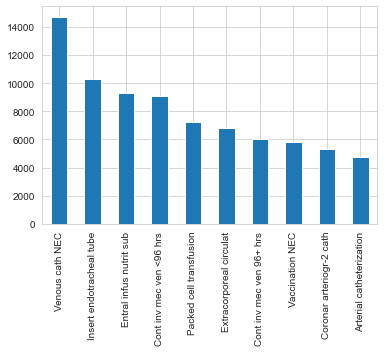

In [18]:
merged_procedures['SHORT_TITLE'].value_counts().head(10).plot(kind='bar')

In [19]:
merged_procedures['SHORT_TITLE'].nunique()

2056

There are 2056 unique procedures that were carried out.

With this, the **Hospital Record System** subsection is over.
The tables are summarised below: <br>
**CPTEVENTS**: Procedures recorded as Current Procedural Terminology (CPT) codes <br>
**DIAGNOSES_ICD**: Hospital assigned diagnoses, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system <br>
**DRGCODES**: Diagnosis Related Groups (DRG), which are used by the hospital for billing purposes. <br>
**LABEVENTS**: Laboratory measurements for patients both within the hospital and in out patient clinics <br>
**MICROBIOLOGYEVENTS**: Microbiology measurements and sensitivities from the hospital database <br>
**PRESCRIPTIONS**: Medications ordered, and not necessarily administered, for a given patient <br>
**PROCEDURES_ICD**: Patient procedures, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system <br>